In [1]:
import json
#from bs4 import BeautifulSoup

In [2]:
import re

def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s.?!]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    return text  

In [3]:
pwd()

'C:\\Users\\alpha'

In [2]:
file_name = 'data/petitions/petitions_2019-01'
with open(file_name, "r", encoding='utf-8', errors='ignore') as file:
    datas = file.readlines()

FileNotFoundError: [Errno 2] No such file or directory: 'data/petitions/petitions_2019-01'

# 1. Language model data 생성

### 1.1 데이터 탐색

In [5]:
print(type(datas), len(datas))

<class 'list'> 12221


In [6]:
datas[0]

'{"category": "성장동력", "begin": "2019-01-01", "end": "2019-01-31", "content": "국민과 소통하시고 자유롭고 행복한 나라를 만들기 위해 힘쓰고 계신 대통령께 존경과 찬사를 올립니다. 기해년 새해 복 많이 받으십시오. 저는 경북 울진군 북면 부구검성로 12번지에 살고 있는 북면발전협의회장 이희국이라고 합니다. 저는 8기의 원전이 가동․건설되고 있는 이곳 북면에 태어나 68년째 거주하고 있는 원전지역 주민입니다. 간절한 마음을 담아 대통령께 다음과 같이 호소 드립니다. ‘울진군민과 약속한 신한울 3,4호기 원전건설을 재개해 주십시오.’ 여태껏 단 한 번도 원전 건설을 원한 적 없는 제가 신한울 3,4호기 원전 건설을 청하는 까닭을 말씀드리겠습니다. 경상북도 동해안 최북단 울진군은 예부터 산과 바다, 계곡의 울창함이 보배처럼 아름답다하여 “울진(蔚珍)”이라는 지명을 간직하게 된 곳입니다. 이러한 곳에 1981년 원전사업의 시작으로 울진군에 북면(6기), 산포지구(6기), 직산지구(6기)가 원전 예정지역으로 지정되면서, 먼저 북면 부구리 지역에 원전 6기가 건설되었습니다. 해안선이 잘려나가고 마을 한복판에 고압 송전탑이 들어섰습니다. 어장이 파괴되고 지역 특산품에 방사능 꼬리표가 붙었습니다. 삶의 터전이 무너졌으며 선량한 울진군민은 원전반대 시위를 했다는 이유로 범죄자가 되었습니다. 그러던 지난 1999년 정부는 산포지구에 전원개발사업예정구역 지정고시 강행 통보를 통해 추가원전을 건설하려 했습니다. 저를 비롯한 모든 지역주민이 결사반대 투쟁을 했지만 정부는 일방적이었습니다. 울진군민과 정부(산업부 장관, 한수원 사장)의 오랜 협의결과, 산포지구(6기), 직산지구(6기)를 해제하는 조건으로 ‘신규원전 4개호기 건설을 마지막으로 더 이상의 원전 관련 시설을 건설하지 않겠다’는 약속을 함으로써, 북면 부구리 기존 지구에 4기의 추가 원전건설을 수용했습니다. 그것이 바로 신한울 1,2,3,4호기였고 정부와 울진군민이 

In [7]:
data = json.loads(datas[0])

In [8]:
data.keys()

dict_keys(['category', 'begin', 'end', 'content', 'num_agree', 'petition_idx', 'status', 'title'])

In [9]:
data['content']

'국민과 소통하시고 자유롭고 행복한 나라를 만들기 위해 힘쓰고 계신 대통령께 존경과 찬사를 올립니다. 기해년 새해 복 많이 받으십시오. 저는 경북 울진군 북면 부구검성로 12번지에 살고 있는 북면발전협의회장 이희국이라고 합니다. 저는 8기의 원전이 가동․건설되고 있는 이곳 북면에 태어나 68년째 거주하고 있는 원전지역 주민입니다. 간절한 마음을 담아 대통령께 다음과 같이 호소 드립니다. ‘울진군민과 약속한 신한울 3,4호기 원전건설을 재개해 주십시오.’ 여태껏 단 한 번도 원전 건설을 원한 적 없는 제가 신한울 3,4호기 원전 건설을 청하는 까닭을 말씀드리겠습니다. 경상북도 동해안 최북단 울진군은 예부터 산과 바다, 계곡의 울창함이 보배처럼 아름답다하여 “울진(蔚珍)”이라는 지명을 간직하게 된 곳입니다. 이러한 곳에 1981년 원전사업의 시작으로 울진군에 북면(6기), 산포지구(6기), 직산지구(6기)가 원전 예정지역으로 지정되면서, 먼저 북면 부구리 지역에 원전 6기가 건설되었습니다. 해안선이 잘려나가고 마을 한복판에 고압 송전탑이 들어섰습니다. 어장이 파괴되고 지역 특산품에 방사능 꼬리표가 붙었습니다. 삶의 터전이 무너졌으며 선량한 울진군민은 원전반대 시위를 했다는 이유로 범죄자가 되었습니다. 그러던 지난 1999년 정부는 산포지구에 전원개발사업예정구역 지정고시 강행 통보를 통해 추가원전을 건설하려 했습니다. 저를 비롯한 모든 지역주민이 결사반대 투쟁을 했지만 정부는 일방적이었습니다. 울진군민과 정부(산업부 장관, 한수원 사장)의 오랜 협의결과, 산포지구(6기), 직산지구(6기)를 해제하는 조건으로 ‘신규원전 4개호기 건설을 마지막으로 더 이상의 원전 관련 시설을 건설하지 않겠다’는 약속을 함으로써, 북면 부구리 기존 지구에 4기의 추가 원전건설을 수용했습니다. 그것이 바로 신한울 1,2,3,4호기였고 정부와 울진군민이 합의한 약속이었습니다. 울진군민은 정부와의 약속에 따라 신한울 1,2,3,4호기 건설에 적극 협조했습니다. 2010년 신한울 1,2호기가 

### 1.2 Language model training data 생성

### nltk sentense spliter

In [10]:
import nltk

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alpha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
from nltk.tokenize import sent_tokenize

In [13]:
for i in range(1):
    data = json.loads(datas[i])
    sentences = sent_tokenize(data['content'])
    for j, sentence in enumerate(sentences):
        print(j, sentence)

0 국민과 소통하시고 자유롭고 행복한 나라를 만들기 위해 힘쓰고 계신 대통령께 존경과 찬사를 올립니다.
1 기해년 새해 복 많이 받으십시오.
2 저는 경북 울진군 북면 부구검성로 12번지에 살고 있는 북면발전협의회장 이희국이라고 합니다.
3 저는 8기의 원전이 가동․건설되고 있는 이곳 북면에 태어나 68년째 거주하고 있는 원전지역 주민입니다.
4 간절한 마음을 담아 대통령께 다음과 같이 호소 드립니다.
5 ‘울진군민과 약속한 신한울 3,4호기 원전건설을 재개해 주십시오.’ 여태껏 단 한 번도 원전 건설을 원한 적 없는 제가 신한울 3,4호기 원전 건설을 청하는 까닭을 말씀드리겠습니다.
6 경상북도 동해안 최북단 울진군은 예부터 산과 바다, 계곡의 울창함이 보배처럼 아름답다하여 “울진(蔚珍)”이라는 지명을 간직하게 된 곳입니다.
7 이러한 곳에 1981년 원전사업의 시작으로 울진군에 북면(6기), 산포지구(6기), 직산지구(6기)가 원전 예정지역으로 지정되면서, 먼저 북면 부구리 지역에 원전 6기가 건설되었습니다.
8 해안선이 잘려나가고 마을 한복판에 고압 송전탑이 들어섰습니다.
9 어장이 파괴되고 지역 특산품에 방사능 꼬리표가 붙었습니다.
10 삶의 터전이 무너졌으며 선량한 울진군민은 원전반대 시위를 했다는 이유로 범죄자가 되었습니다.
11 그러던 지난 1999년 정부는 산포지구에 전원개발사업예정구역 지정고시 강행 통보를 통해 추가원전을 건설하려 했습니다.
12 저를 비롯한 모든 지역주민이 결사반대 투쟁을 했지만 정부는 일방적이었습니다.
13 울진군민과 정부(산업부 장관, 한수원 사장)의 오랜 협의결과, 산포지구(6기), 직산지구(6기)를 해제하는 조건으로 ‘신규원전 4개호기 건설을 마지막으로 더 이상의 원전 관련 시설을 건설하지 않겠다’는 약속을 함으로써, 북면 부구리 기존 지구에 4기의 추가 원전건설을 수용했습니다.
14 그것이 바로 신한울 1,2,3,4호기였고 정부와 울진군민이 합의한 약속이었습니다.
15 울진군민은 정부와의 약속에 따라 신한울 1,2,3

In [19]:
file_path = "data/petitions/petition.lm.train"

with open(file_path, 'a', encoding='UTF8') as file:
    for i in range(len(datas)):
        data = json.loads(datas[i])
        
        content = clean_str(data['content'])
        
        sentences = sent_tokenize(content)
        
        # BERT 모델은 문단 내 문장의 개수가 2개 이상이여야 함
        if len(sentences) < 2:
            continue
        
        for sentence in sentences:
            sentence = sentence.strip()
            
            file.write(sentence + "\n")
        
        if i != 0 and i % 1000 == 0:
            print(i, "items has been converted")
            
        file.write("\n")
            
        #if i == 5000:
        #    break
            
    print("Total {0} items has been converted".format(len(datas)))

1000 items has been converted
2000 items has been converted
3000 items has been converted
4000 items has been converted
7000 items has been converted
8000 items has been converted
9000 items has been converted
10000 items has been converted
Total 12221 items has been converted


### koalanlp sentense spliter

In [10]:
from koalanlp import API
from koalanlp.proc import SentenceSplitter
from koalanlp.Util import initialize, finalize

In [11]:
#initialize(java_options="-Xmx4g", KKMA="2.0.4", ETRI="2.0.4")
initialize(java_options="-Xmx4g", HNN="2.0.0")

py4j.java_gateway Callback Server Starting
py4j.java_gateway Socket listening on ('127.0.0.1', 25334)
jip JVM initialization procedure is completed.


In [12]:
splitter = SentenceSplitter(API.HNN)

In [13]:
for i in range(1):
    data = json.loads(datas[i])
    sentences = splitter(data['content'])
    for j, sentence in enumerate(sentences):
        print(j, sentence)

0 국민과 소통하시고 자유롭고 행복한 나라를 만들기 위해 힘쓰고 계신 대통령께 존경과 찬사를 올립니다 . 
1 기해년 새해 복 많이 받으십시오 . 
2 저는 경북 울진군 북면 부구검성로 12번지에 살고 있는 북면발전협의회장 이희국이라고 합니다 . 
3 저는 8기의 원전이 가동․건설되고 있는 이곳 북면에 태어나 68년째 거주하고 있는 원전지역 주민입니다 . 
4 간절한 마음을 담아 대통령께 다음과 같이 호소 드립니다 . 
5 ‘울진군민과 약속한 신한울 3,4호기 원전건설을 재개해 주십시오 . 
6 ’ 여태껏 단 한 번도 원전 건설을 원한 적 없는 제가 신한울 3,4호기 원전 건설을 청하는 까닭을 말씀드리겠습니다 . 
7 경상북도 동해안 최북단 울진군은 예부터 산과 바다, 계곡의 울창함이 보배처럼 아름답다하여 “울진(蔚珍)”이라는 지명을 간직하게 된 곳입니다 . 
8 이러한 곳에 1981년 원전사업의 시작으로 울진군에 북면(6기), 산포지구(6기), 직산지구(6기)가 원전 예정지역으로 지정되면서, 먼저 북면 부구리 지역에 원전 6기가 건설되었습니다 . 
9 해안선이 잘려나가고 마을 한복판에 고압 송전탑이 들어섰습니다 . 
10 어장이 파괴되고 지역 특산품에 방사능 꼬리표가 붙었습니다 . 
11 삶의 터전이 무너졌으며 선량한 울진군민은 원전반대 시위를 했다는 이유로 범죄자가 되었습니다 . 
12 그러던 지난 1999년 정부는 산포지구에 전원개발사업예정구역 지정고시 강행 통보를 통해 추가원전을 건설하려 했습니다 . 
13 저를 비롯한 모든 지역주민이 결사반대 투쟁을 했지만 정부는 일방적이었습니다 . 
14 울진군민과 정부(산업부 장관, 한수원 사장)의 오랜 협의결과, 산포지구(6기), 직산지구(6기)를 해제하는 조건으로 ‘신규원전 4개호기 건설을 마지막으로 더 이상의 원전 관련 시설을 건설하지 않겠다’는 약속을 함으로써, 북면 부구리 기존 지구에 4기의 추가 원전건설을 수용했습니다 . 
15 그것이 바로 신한울 1,2,3,4호기였고 정부와 울진군민이 합의한 약속이었습

In [14]:
file_path = "data/petitions/petition.lm.train"

with open(file_path, 'a', encoding='UTF8') as file:
    for i in range(len(datas)):
        data = json.loads(datas[i])
        
        content = clean_str(data['content'])
        
        sentences = splitter(content)
        
        # BERT 모델은 문단 내 문장의 개수가 2개 이상이여야 함
        if len(sentences) < 2:
            continue
        
        for sentence in sentences:
            sentence = sentence.strip()
            if sentence.startswith("\""):
                sentence = sentence[1:]
            if sentence.endswith("\""):
                sentence = sentence[0:-1]
            if sentence.endswith(".") or sentence.endswith("!") or sentence.endswith("?"):
                sentence = sentence[:-2] + sentence[len(sentence) - 1]
            
            file.write(sentence + "\n")
        
        if i != 0 and i % 1000 == 0:
            print(i, "items has been converted")
            
        file.write("\n")
            
        #if i == 5000:
        #    break
            
    print("Total {0} items has been converted".format(len(datas)))

1000 items has been converted
2000 items has been converted
3000 items has been converted
4000 items has been converted
5000 items has been converted
7000 items has been converted
8000 items has been converted
9000 items has been converted
10000 items has been converted
Total 12221 items has been converted


In [18]:
finalize()

### KoNLPy Twitter phrase spliter

In [3]:
import konlpy.tag import Okt

SyntaxError: invalid syntax (<ipython-input-3-92dfd33195c0>, line 1)

In [1]:
okt = Okt()

NameError: name 'Okt' is not defined

### KoNLPy 꼬꼬마 sentense spliter

In [15]:
# https://konlpy-ko.readthedocs.io/ko/v0.4.3/install/
# https://konlpy-ko.readthedocs.io/ko/v0.4.3/

In [10]:
from konlpy.tag import Kkma

In [11]:
kkma = Kkma()

In [17]:
for i in range(1):
    data = json.loads(datas[i])
    sentences = okt.phrases(data['content'])
    for j, sentence in enumerate(sentences):
        print(j, sentence)

0 국민
1 국민과 소통
2 자유
3 행복한 나라
4 만들기
5 만들기 위해
6 계신 대통령
7 존경
8 존경과 찬사
9 기해년
10 기해년 새해
11 기해년 새해 복
12 경북
13 경북 울진군
14 경북 울진군 북면
15 경북 울진군 북면 부구검성
16 12번지
17 있는 북면발전협의회장
18 있는 북면발전협의회장 이희국
19 8기
20 8기의 원전
21 가동
22 건설
23 있는 이곳
24 있는 이곳 북면
25 68년
26 거주
27 있는 원전지역
28 있는 원전지역 주민
29 간절한 마음
30 대통령
31 다음
32 호소
33 울진군민
34 울진군민과 약속
35 신한울
36 신한울 3
37 4호기
38 4호기 원전건설
39 재개
40 주십시오
41 여태껏
42 여태껏 단
43 여태껏 단 한 번
44 원전
45 원전 건설
46 원한
47 원한 적
48 원한 적 없는 제
49 4호기 원전
50 4호기 원전 건설
51 청하는 까닭
52 경상북도
53 경상북도 동해안
54 경상북도 동해안 최북단
55 경상북도 동해안 최북단 울진군
56 산과 바다
57 계곡
58 계곡의 울창함
59 보배
60 울진
61 지명
62 간직
63 이러한 곳
64 1981년
65 1981년 원전사업
66 1981년 원전사업의 시작
67 울진군
68 북면
69 6기
70 산포지구
71 직산지구
72 원전 예정지역
73 지정
74 먼저
75 먼저 북면
76 지역
77 원전 6기
78 해안선
79 마을
80 마을 한복판
81 고압
82 고압 송전탑
83 어장
84 파괴
85 지역 특산품
86 방사능
87 방사능 꼬리표
88 삶의 터전
89 선량한 울진군민
90 원전반대
91 원전반대 시위
92 이유
93 범죄자
94 그러던 지난
95 그러던 지난 1999년
96 그러던 지난 1999년 정부
97 전원개발사업예정구역
98 전원개발사업예정구역 지정고시
99 전원개발사업예정구역 지정고시 강행
100 전원개발사업예정구역 지정고시 강행 통보
101 통해
102 통해 추가원전
103 비롯
104 모든

In [14]:
file_path = "data/petitions/petition.lm.train"

with open(file_path, 'a', encoding='UTF8') as file:
    for i in range(len(datas)):
        data = json.loads(datas[i])
        
        content = clean_str(data['content'])
        
        sentences = kkma.sentences(content)
        
        # BERT 모델은 문단 내 문장의 개수가 2개 이상이여야 함
        if len(sentences) < 2:
            continue
        
        for sentence in sentences:
            sentence = sentence.strip()
            
            file.write(sentence + "\n")
        
        if i != 0 and i % 1000 == 0:
            print(i, "items has been converted")
            
        file.write("\n")
            
        #if i == 5000:
        #    break
            
    print("Total {0} items has been converted".format(len(datas)))

1000 items has been converted


KeyboardInterrupt: 

#  

# 2. Wordpiece model 생성

In [18]:
import sentencepiece as spm

In [16]:
input_file = 'data/petitions/petition.lm.train'
templates = '--input={} --model_prefix={} --vocab_size={}'
vocab_size = 30000
prefix = 'data/petitions/sp-30000'
cmd = templates.format(input_file, prefix, vocab_size)

In [17]:
# train
spm.SentencePieceTrainer.Train(cmd)

True

#  

# 3. 사전 생성

In [18]:
in_file_path = "data/petitions/sp-30000.vocab"
out_file_path = "data/petitions/vocab.txt"

with open(in_file_path, encoding='utf-8') as f_in:
    with open(out_file_path, 'a', encoding='UTF8') as f_out:
        f_out.write("[PAD]\n")
        f_out.write("[CLS]\n")
        f_out.write("[SEP]\n")
        f_out.write("[MASK]\n")
        for word in f_in:
            if word.split('\t')[0].strip() == '<unk>':
                f_out.write("[UNK]\n")
            else:
                f_out.write(word.split('\t')[0].strip() + "\n")

#  

# 4. Multi-classification model data 생성

### 4.1 데이터 탐색

In [19]:
print(type(datas), len(datas))

<class 'list'> 12221


In [20]:
datas[0]

'{"category": "성장동력", "begin": "2019-01-01", "end": "2019-01-31", "content": "국민과 소통하시고 자유롭고 행복한 나라를 만들기 위해 힘쓰고 계신 대통령께 존경과 찬사를 올립니다. 기해년 새해 복 많이 받으십시오. 저는 경북 울진군 북면 부구검성로 12번지에 살고 있는 북면발전협의회장 이희국이라고 합니다. 저는 8기의 원전이 가동․건설되고 있는 이곳 북면에 태어나 68년째 거주하고 있는 원전지역 주민입니다. 간절한 마음을 담아 대통령께 다음과 같이 호소 드립니다. ‘울진군민과 약속한 신한울 3,4호기 원전건설을 재개해 주십시오.’ 여태껏 단 한 번도 원전 건설을 원한 적 없는 제가 신한울 3,4호기 원전 건설을 청하는 까닭을 말씀드리겠습니다. 경상북도 동해안 최북단 울진군은 예부터 산과 바다, 계곡의 울창함이 보배처럼 아름답다하여 “울진(蔚珍)”이라는 지명을 간직하게 된 곳입니다. 이러한 곳에 1981년 원전사업의 시작으로 울진군에 북면(6기), 산포지구(6기), 직산지구(6기)가 원전 예정지역으로 지정되면서, 먼저 북면 부구리 지역에 원전 6기가 건설되었습니다. 해안선이 잘려나가고 마을 한복판에 고압 송전탑이 들어섰습니다. 어장이 파괴되고 지역 특산품에 방사능 꼬리표가 붙었습니다. 삶의 터전이 무너졌으며 선량한 울진군민은 원전반대 시위를 했다는 이유로 범죄자가 되었습니다. 그러던 지난 1999년 정부는 산포지구에 전원개발사업예정구역 지정고시 강행 통보를 통해 추가원전을 건설하려 했습니다. 저를 비롯한 모든 지역주민이 결사반대 투쟁을 했지만 정부는 일방적이었습니다. 울진군민과 정부(산업부 장관, 한수원 사장)의 오랜 협의결과, 산포지구(6기), 직산지구(6기)를 해제하는 조건으로 ‘신규원전 4개호기 건설을 마지막으로 더 이상의 원전 관련 시설을 건설하지 않겠다’는 약속을 함으로써, 북면 부구리 기존 지구에 4기의 추가 원전건설을 수용했습니다. 그것이 바로 신한울 1,2,3,4호기였고 정부와 울진군민이 

In [21]:
json.loads(datas[0])['category']

'성장동력'

### category info

In [10]:
from collections import defaultdict

In [11]:
petition_category = defaultdict(int)

In [12]:
for i in range(len(datas)):
    category = json.loads(datas[i])['category']
    petition_category[category] += 1

In [13]:
print(len(petition_category))

17


In [14]:
petition_category

defaultdict(int,
            {'성장동력': 239,
             '농산어촌': 79,
             '일자리': 923,
             '경제민주화': 472,
             '행정': 574,
             '보건복지': 851,
             '미래': 542,
             '정치개혁': 2140,
             '기타': 1497,
             '교통/건축/국토': 842,
             '인권/성평등': 964,
             '안전/환경': 1111,
             '문화/예술/체육/언론': 585,
             '외교/통일/국방': 625,
             '육아/교육': 500,
             '반려동물': 184,
             '저출산/고령화대책': 93})

### contents info 

In [15]:
import numpy as np
import pandas as pd

In [19]:
sp = spm.SentencePieceProcessor()
sp.Load('data/petitions/sp-30000.model')

True

In [20]:
data = json.loads(datas[0])
content = clean_str(data['content'])
tokens = sp.EncodeAsPieces(content)
print(len(tokens))
print(tokens)

831
['▁국민과', '▁소통', '하시고', '▁자유', '롭', '고', '▁행복한', '▁나라를', '▁만들기', '▁위해', '▁힘쓰', '고', '▁계신', '▁대통령께', '▁존경', '과', '▁찬사', '를', '▁올립니다', '.', '▁기해년', '▁새해', '▁복', '▁많이', '▁받으', '십시오', '.', '▁저는', '▁경북', '▁울', '진', '군', '▁북', '면', '▁부', '구', '검', '성', '로', '▁12', '번지에', '▁살고', '▁있는', '▁북', '면', '발전', '협의회', '장', '▁이', '희', '국', '이라고', '▁합니다', '.', '▁저는', '▁8', '기', '의', '▁원전', '이', '▁가동', '건설', '되고', '▁있는', '▁이곳', '▁북', '면', '에', '▁태어나', '▁68', '년째', '▁거주하고', '▁있는', '▁원전', '지역', '▁주민입니다', '.', '▁간절한', '▁마음을', '▁담아', '▁대통령께', '▁다음과', '▁같이', '▁호소', '▁드립니다', '.', '▁울진군민', '과', '▁약속한', '▁신한울', '▁34', '호기', '▁원전', '건설', '을', '▁재개', '해', '▁주십시오', '.', '▁여태껏', '▁단', '▁한', '▁번', '도', '▁원전', '▁건설', '을', '▁원한', '▁적', '▁없는', '▁제가', '▁신한울', '▁34', '호기', '▁원전', '▁건설', '을', '▁청', '하는', '▁까닭', '을', '▁말씀드리겠습니다', '.', '▁경상북도', '▁동해안', '▁최', '북', '단', '▁울', '진', '군', '은', '▁예', '부터', '▁산', '과', '▁바다', '▁계곡', '의', '▁울', '창', '함이', '▁보', '배', '처럼', '▁아름답', '다', '하여', '▁울', '진', '蔚珍', '이라는', '▁지', '명을', '▁간직

In [21]:
# content tokenizing
c_list = []
for i in range(len(datas)):
    data = json.loads(datas[i])
    content = clean_str(data['content'])
    category = data['category']
    tokens = sp.EncodeAsPieces(content)

    c_list.append((content, tokens, category,len(tokens)))

In [22]:
len(c_list)

12221

In [23]:
df = pd.DataFrame(c_list, columns=['contents','tokens','category','count']) 

In [24]:
df.head(5)

,contents,tokens,category,count
0,국민과 소통하시고 자유롭고 행복한 나라를 만들기 위해 힘쓰고 계신 대통령께 존경과 ...,"[▁국민과, ▁소통, 하시고, ▁자유, 롭, 고, ▁행복한, ▁나라를, ▁만들기, ...",성장동력,831
1,2008년 10월. 대한민국 공직사회 최대 스캔들이라 불리는 쌀 직불금 부정수급 사...,"[▁2008, 년, ▁10, 월, ., ▁대한민국, ▁공직사회, ▁최대, ▁스캔, ...",농산어촌,272
2,대한민국 국민은 소득주도성장 정책의 폐기를 원합니다. 존경하는 문재인 대통령님. 많...,"[▁대한민국, ▁국민은, ▁소득주도성장, ▁정책의, ▁폐기, 를, ▁원합니다, .,...",일자리,278
3,한국전기안전공사에서 2018년 10월 23일 부터 11월 6일 까지 장애인복지법 제...,"[▁한국전, 기, 안전, 공사, 에서, ▁2018, 년, ▁10, 월, ▁23, 일...",일자리,639
4,인천 구월동 한샘 상생전시장에 범죄자가 차명으로 입점하여 본인이 대표행세를 하며 고...,"[▁인천, ▁구, 월, 동, ▁한샘, ▁상생, 전, 시장, 에, ▁범죄자, 가, ▁...",경제민주화,192


In [25]:
df['count'].describe()

count    12221.00000
mean       211.58645
std        507.02474
min          0.00000
25%         55.00000
50%        114.00000
75%        218.00000
max      18758.00000
Name: count, dtype: float64

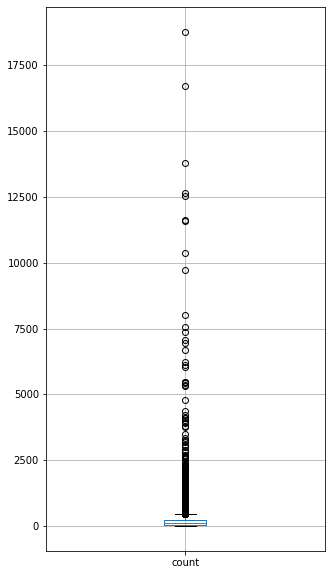

In [27]:
df.boxplot(column=['count'], figsize=(5,10))

In [28]:
df[df['count'] == 0]

,contents,tokens,category,count
1266,,[],기타,0
2749,,[],일자리,0
4299,,[],안전/환경,0
12108,,[],정치개혁,0


In [29]:
df = df[df['count'] > 0]
print(len(df))

12217


In [30]:
print(len(df))
print(len(df[df['count'] > 512]))
print(len(df[df['count'] > 512]) / len(df))

12217
885
0.07244004256364082


In [31]:
df['count'].describe()

count    12217.000000
mean       211.655726
std        507.093285
min          1.000000
25%         55.000000
50%        114.000000
75%        218.000000
max      18758.000000
Name: count, dtype: float64

### 4.2 Multi-classification model training data 생성

In [32]:
from sklearn.utils import shuffle
df = shuffle(df)

In [33]:
category_dictionary = {
    '경제민주화' : '0', 
    '교통/건축/국토' : '1', 
    '기타' : '2',
    '농산어촌' : '3',
    '문화/예술/체육/언론' : '4',
    '미래' : '5',
    '반려동물' : '6',
    '보건복지' : '7',
    '성장동력' : '8',
    '안전/환경' : '9',
    '외교/통일/국방' : '10',
    '육아/교육' : '11',
    '인권/성평등' : '12',
    '일자리' : '13',
    '저출산/고령화대책' : '14',
    '정치개혁' : '15',
    '행정' : '16',
} 

In [34]:
df['category_label'] = df['category'].map(category_dictionary)

In [35]:
df.head(5)

,contents,tokens,category,count,category_label
838,정년 병원에서도 만으로 하는데 청소년 음주등도... 일반 생활에선 아직 일반 나이로...,"[▁정년, ▁병원에서, 도, ▁만으로, ▁하는데, ▁청소년, ▁음주, 등, 도, ....",보건복지,103,7
9600,문재인은 머하는데 해결도 안하나,"[▁문재인은, ▁머, 하는데, ▁해결, 도, ▁안, 하나]",안전/환경,7,9
2078,소년법이 만들어진 이유가 뭐였지요? 소년들이 생계유지나 그외의 일로 어쩔수 없게 범...,"[▁소년법, 이, ▁만들어진, ▁이유가, ▁뭐, 였, 지요, ?, ▁소, 년, 들이...",기타,57,2
11700,저는 현재 20대 후반의 취준생 남성입니다. 2018년 가을 부모님께서는 여행을 가...,"[▁저는, ▁현재, ▁20, 대, ▁후반, 의, ▁취준생, ▁남성입니다, ., ▁2...",외교/통일/국방,343,10
3281,대전 유성구에 사는 평범한 아이둘 아빠입니다! 요세 유성전통5일시장이 없이지고 거기...,"[▁대전, ▁유, 성, 구, 에, ▁사는, ▁평범한, ▁아이, 둘, ▁아빠입니다, ...",경제민주화,94,0


In [36]:
df_train = df.iloc[:10000]
df_dev = df.iloc[10000:]

In [37]:
print(len(df_train))
print(len(df_dev))
print(len(df_train)+len(df_dev))

10000
2217
12217


In [38]:
df_train.head(5)

,contents,tokens,category,count,category_label
838,정년 병원에서도 만으로 하는데 청소년 음주등도... 일반 생활에선 아직 일반 나이로...,"[▁정년, ▁병원에서, 도, ▁만으로, ▁하는데, ▁청소년, ▁음주, 등, 도, ....",보건복지,103,7
9600,문재인은 머하는데 해결도 안하나,"[▁문재인은, ▁머, 하는데, ▁해결, 도, ▁안, 하나]",안전/환경,7,9
2078,소년법이 만들어진 이유가 뭐였지요? 소년들이 생계유지나 그외의 일로 어쩔수 없게 범...,"[▁소년법, 이, ▁만들어진, ▁이유가, ▁뭐, 였, 지요, ?, ▁소, 년, 들이...",기타,57,2
11700,저는 현재 20대 후반의 취준생 남성입니다. 2018년 가을 부모님께서는 여행을 가...,"[▁저는, ▁현재, ▁20, 대, ▁후반, 의, ▁취준생, ▁남성입니다, ., ▁2...",외교/통일/국방,343,10
3281,대전 유성구에 사는 평범한 아이둘 아빠입니다! 요세 유성전통5일시장이 없이지고 거기...,"[▁대전, ▁유, 성, 구, 에, ▁사는, ▁평범한, ▁아이, 둘, ▁아빠입니다, ...",경제민주화,94,0


In [39]:
df_dev.head(5)

,contents,tokens,category,count,category_label
1844,신부님 스님들은 결혼을 안하시고 아기도 안낳으시자나요 그러면안된다고 생각해요 아무리...,"[▁신, 부, 님, ▁스, 님들, 은, ▁결혼을, ▁안, 하시고, ▁아기, 도, ▁...",저출산/고령화대책,49,14
887,김정은 신년사를 100번이고 다시 재생해서 봤습니다. 도저히 한국과 미국에 협박에 ...,"[▁김정은, ▁신년사, 를, ▁100, 번, 이고, ▁다시, ▁재생, 해서, ▁봤습...",외교/통일/국방,109,10
9978,밥버러지들 데모 판에 정치인들 슬금슬금 눈치보며 지지율 좀 쳐 올리겠다며 그들 손을...,"[▁밥, 버, 러, 지, 들, ▁데, 모, ▁판에, ▁정치인들, ▁슬, 금, 슬, ...",기타,88,2
388,전두환씨 처가 전두환씨를 민주주의의 아버지라고 주장했습니다. 전두환 노태우는 범죄자...,"[▁전두환씨, ▁처, 가, ▁전두환씨, 를, ▁민주주의, 의, ▁아버지, 라고, ▁...",정치개혁,125,15
2123,2018년 대한민국에서 일어난 한국 주식역사상 최대의 공매도 관련 이슈로써 자세한 ...,"[▁2018, 년, ▁대한민국에서, ▁일어난, ▁한국, ▁주식, 역사, 상, ▁최대...",경제민주화,336,0


In [40]:
df_dev.groupby('category')['category'].count()

category
경제민주화           84
교통/건축/국토       152
기타             253
농산어촌            13
문화/예술/체육/언론    114
미래              81
반려동물            35
보건복지           168
성장동력            43
안전/환경          201
외교/통일/국방       108
육아/교육           94
인권/성평등         182
일자리            156
저출산/고령화대책       16
정치개혁           409
행정             108
Name: category, dtype: int64

In [41]:
df_train.groupby('category')['category'].count()

category
경제민주화           388
교통/건축/국토        690
기타             1243
농산어촌             66
문화/예술/체육/언론     471
미래              461
반려동물            149
보건복지            683
성장동력            196
안전/환경           909
외교/통일/국방        517
육아/교육           406
인권/성평등          782
일자리             766
저출산/고령화대책        77
정치개혁           1730
행정              466
Name: category, dtype: int64

In [43]:
train_file_path = "data/petitions/petition.mcc.train"
dev_file_path = "data/petitions/petition.mcc.dev"
df_train.to_csv(train_file_path, columns=['contents','category_label'],sep='\t')
df_dev.to_csv(dev_file_path, columns=['contents','category_label'],sep='\t')